In [ ]:
# https://nirpyresearch.com/partial-least-squares-regression-python/
# PLS Regression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def pcaFcn(input_data, output_data, pca_count, scale_yn):
    pca = PCA(n_components=pca_count)
    input_data_pca = pca.fit_transform(input_data)
    X_train, X_test, y_train, y_test = train_test_split(input_data_pca, output_data, shuffle=True, test_size=0.15)
    if(scale_yn == "Y"):
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)
        
    y_train = np.array(y_train).astype(float) # 정수로 변환
    y_test = np.array(y_test).astype(float)

        
    return (X_train, X_test, y_train, y_test)
    
"""
:param x_data       : 입력 데이터
:param y_data       : 출력 데이터
:param test_data    : 테스트 데이터
:param hidden_layer : 층
:return: RMSE 값
"""
def neuralNetwork(x_data, y_data, test_data, y_test, hidden_layer):
    # NN
    mlp = MLPClassifier(solver='lbfgs', random_state=2, hidden_layer_sizes=[hidden_layer]).fit(x_data, y_data)
    pdct = mlp.predict(test_data)
    score = mlp.score(test_data, y_test)
    return (pdct, score)


'\n:param x_data       : 입력 데이터\n:param y_data       : 출력 데이터\n:param test_data    : 테스트 데이터\n:param hidden_layer : 층\n:return: RMSE 값\n'

In [ ]:
input_data = pd.read_excel('usa_city_weather_history_raw_data.xlsx', sheet_name='Mod_input_data', engine='openpyxl', header=[0, 1], index_col=[0])
output_data = pd.read_excel('usa_city_weather_history_raw_data.xlsx', sheet_name='Output_data', engine='openpyxl', header=[0, 1], index_col=[0])

# 하루 데이터 간격으로 예측
input_data = input_data.iloc[:-1]
output_data = output_data[1:]
# 최저온도 예측
output_data = output_data[("Temperature (°F)", "Max")]
# output_data = output_data[("Wind Speed (mph)", "Max")]

0.03125
8.593238621148606


c:\Users\swjin\Documents\study\code\weather_forecasting\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<Figure size 2000x600 with 0 Axes>

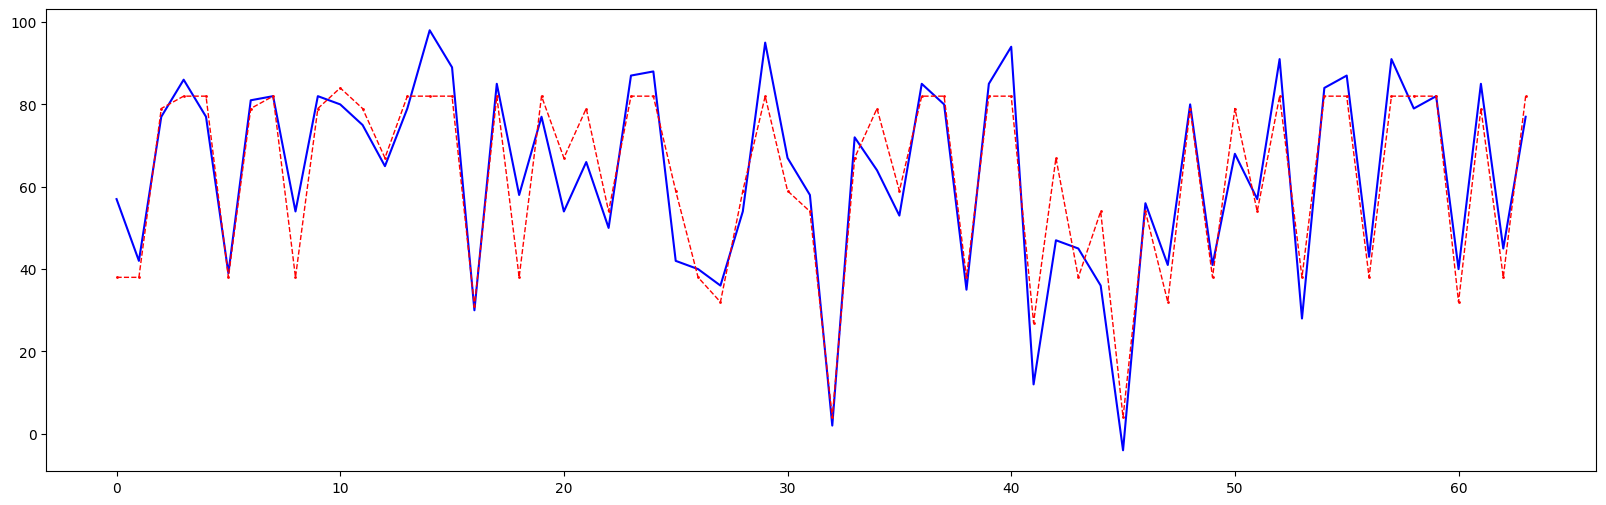

In [ ]:
# best_accuracy = 0
# best_i = 0
# best_j = 0
# best_score = 0

# for i in range(1, 100):
#     for j in range(1, 10):
#         # PCA
#         data_set = pcaFcn(input_data, output_data, i, "Y")
#         X_train, X_test, y_train, y_test = data_set
#         # NN 예측
#         prdct, score = neuralNetwork(X_train, y_train, X_test, y_test, j)
#         accuracy = rmse(prdct, y_test)
        
#         if score > best_score:
#             best_score = score
#             best_i = i
#             best_j = j
#             best_accuracy = accuracy
            
# print("Best i value:", best_i)
# print("Best j value:", best_j)
# print("Best score value", best_score)
# print("Best rmse value", best_accuracy)


# NN 예측
data_set = pcaFcn(input_data, output_data, 9, "Y")
X_train, X_test, y_train, y_test = data_set
# NN 예측
prdct, score = neuralNetwork(X_train, y_train, X_test, y_test, 4)
print(score)
print(rmse(prdct, y_test))

plt.figure(figsize=(20,6))
plt.plot(y_test, c='b')
plt.plot(prdct, c='r', linestyle = '--', marker = 'o', markersize = 1, linewidth=1)

PLSRegression(n_components=5)

0.9147357177485295
6.811441772342798


<Figure size 2000x600 with 0 Axes>

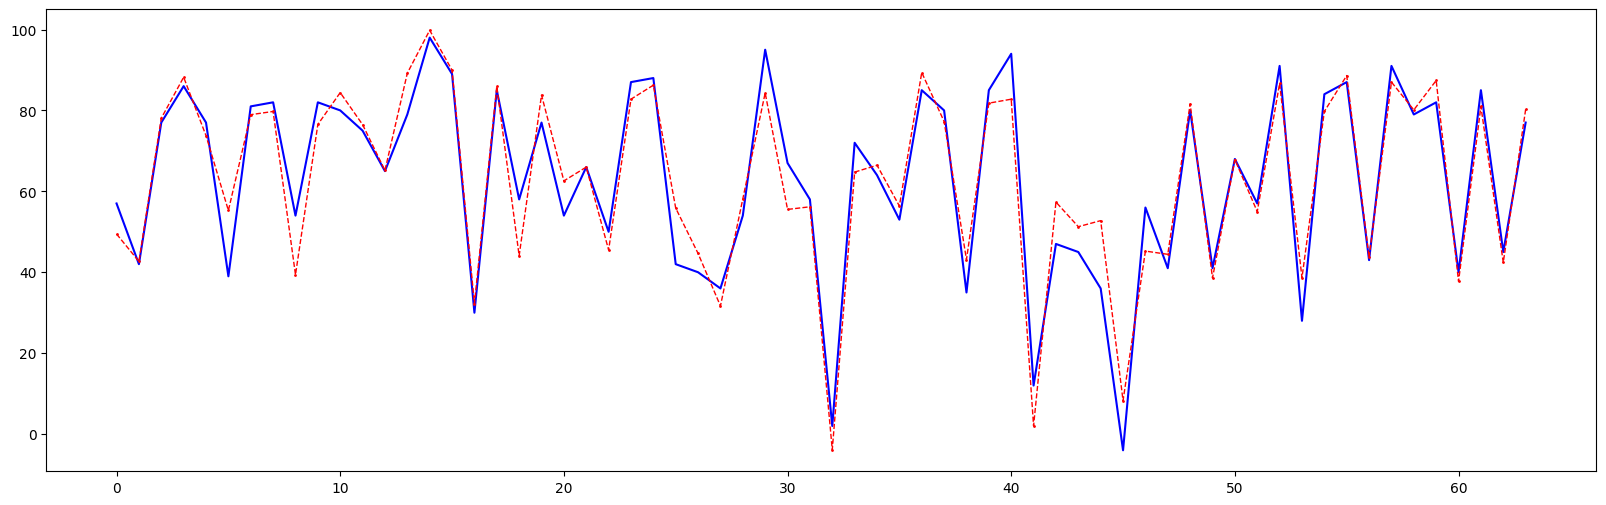

In [ ]:
# Define PLS object
pls = PLSRegression(n_components=5)
 
# Fit
pls.fit(X_train, y_train)
 
# Cross-validation
y_prd = cross_val_predict(pls, X_test, y_test, cv=10)
 
# Calculate scores
score = r2_score(y_test, y_prd)
print(score)
print(rmse(y_prd, y_test))

plt.figure(figsize=(20,6))
plt.plot(y_test, c='b')
plt.plot(y_prd, c='r', linestyle = '--', marker = 'o', markersize = 1, linewidth=1)

 . ARIMA 비교